## Лабораторная 8

# 1. Бинарная линейная классификация

Классификация в которой используется линейная модель $a(x) = sign(\langle w, x \rangle+w_0)$ называется ***бинарной линейной классификацией***, где

* a(x) - целевая переменная(то что предсказываем)

* x - вектор признаков

* w - вектор признаков 

* w_0 - свободный коэффициент(bias)

### 1.1 Предсказания в бинарной линейной классификации

Какое предсказание вернет бинарный линейный классификатор $a(x) = sign(\langle w, x \rangle+w_0)$ для объекта $x=(1, 0, 0, 1, 1)$ при использовании весов $w=(0.1, -0.2, 0.5, -1.1, 0)$ и $w_0=0.35$?

__Решение.__
Запишем скалярное произведение: $\langle w, x \rangle = w_1 x_1 + \dots + w_d x_d$, где $d$ - размерность обоих векторов (число признаков). В нашей задаче $d=5$. Итак, в скобках получится значение $0.1\cdot1 - 0.2\cdot0 + 0.5\cdot 0 -1.1 \cdot 1 + 0 \cdot 1 + 0.35 = -0.65$. Его знак отрицательный, значит $a(x) = -1$.

Визуализируйте разделящую поверхность классификатора $a(x) = sign(\langle w, x \rangle+w_0)$ для $w=(-1, 2)$, $w_0=0.5$, задача бинарной классификации с двумя признаками.

__Решение.__

Предсказания в линейной классификации выполняются по формуле $a(x) = sign(\langle w, x\rangle +w_0)$, то есть класс +1, если выражение в скобках больше 0, и -1, если выражение в скобках меньше 0. Если выражение в скобках равно 0, считаем, что отказываемся от классификации или выбираем случайный класс (на практике такая ситуация встречается очень редко). Соответственно, мы можем сделать такое предсказание в каждой точке признакового пространства, то есть для любого возможного объекта, и получить области классов +1 и -1. Разделяющей границей этих двух областей будет прямая, поэтому классификация линейная.

Разберемся, почему разделяющей границей будет прямая. Вспомним, что уравнение $w_1 x_1 + w_2 x_2 + w_0 = 0$ задает прямую на плоскости в координатах $x_1-x_2$ (мы обычно обозначаем эти координаты $d_1-d_2$, чтобы не путать $x_1$ - первый признак или первый объект в выборке; в данном контексте - первый признак). Все точки $x=(x_1, x_2)$, для которых $w_1 x_1 + w_2 x_2 + w_0 > 0$, находятся с одной стороны от прямой, а все точки, для которых $w_1 x_1 + w_2 x_2 + w_0 < 0$, с другой стороны от прямой. А эти два условия как раз и проверяются в бинарном линейной классификаторе.

В нашем случае прямая задается уравнением $-x_1 + 2 x_2 + 0.5 = 0$. Построим ее по точкам: при $x_1=0$ выполнено $2 x_2+0.5=0$, то есть $x_2=-1/4$; при $x_1=1$ выполнено $2 x_2 -0.5=0$, то есть $x_2=1/4$. Проводим прямую через точки $(0, -1/4)$ и $(1, 1/4)$. Теперь выбираем любую точку, не принадлежащую прямой, например $(0, 1/4)$. Проверяем, какой будет знак выражения $-x_1 + 2 x_2 + 0.5$: $0 + 0.5 + 0.5 = 1 > 0$. Значит, в полуплоскости, где находится эта точка, мы предсказываем класс +1, а в другой - класс -1.

In [511]:
import numpy as np
import matplotlib.pyplot as plt

### Задача 1

Напишите функцию, которая на вход принимает массив признаков и массив весов, а возвращает целевую переменную вычисленную по формуле: $a(x) = sign(\langle w, x \rangle+w_0)$

In [512]:
def f(x, w, b):
    dot_product = np.dot(w, x)
    dot_product += b    
    return np.sign(dot_product)

x = np.array([0, 0])
w = np.array([-1, 2])
b = 0.5

f(x, w, b)

1.0

### Задача 2

Визуализируйте разделящую поверхность классификатора $a(x) = sign(\langle w, x \rangle+w_0)$ для $w=(-1, 2)$, $w_0=0.5$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


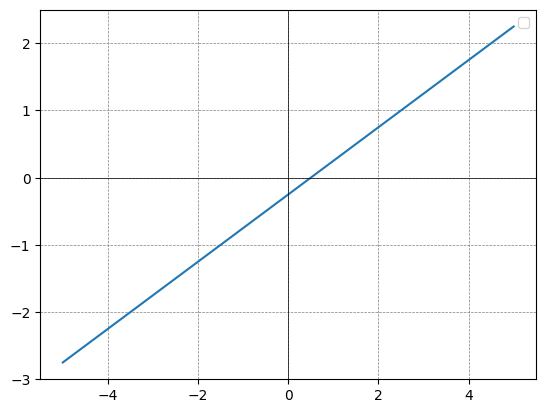

In [513]:
w = np.array([-1, 2])
b = 0.5

x1 = np.linspace(-5, 5, 100)
x2 = -(w[0] * x1 + b) / w[1] 
plt.plot(x1, x2)


plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

## 1.2 Практическая часть
В практической части мы обучим линейный классификатор на данных кредитного скорринга, проанализируем веса модели, научимся работать с категориальными признаками в линейных моделях. Далее поработаем с метриками, сравних их между собой и найдем оптимиальные гиперпараметры в модели.

In [514]:
import pandas as pd

Мы будем работать с [данными клиентов банка](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) (задача кредитного скоринга). Для целей семинара данные были преобразованы в немного другой формат.

Значение признаков:
* account: банковский счет (-1: отриц. баланс, 0: нет счета, 1: до 200 ед., 2: более 200 ед.)
* duration: на какой период запрашивают кредит
* credit_history: рейтинг по кредитной истории (от 0 - отличная кр. история до 4 - критическая ситуация с кредитами)
* amount: на какую сумму запрашивают кредит
* savings: сберегательный счет (0: нет, 1: < 100, 2: 100 <= ... < 500, 3: 500 <= ... < 1000, 4:  >= 1000)
* employment: срок работы на текущей позиции (0: не работает, 1: до 1 года, 2: от 1 до 4 лет, 3: от 4 до 7 лет, 4: более 7 лет)
* guarantors: 1 - есть поручители, 0 - нет
* residence:  сколько лет резидент
* age: возраст, деленный на 100
* credits_number: число кредитов
* job: 0: не работает, 1: неквалифицированный, 2: квалифицированный специалист, 3: высокая должность или бизнес
* maintenance_people: число людей, которых обеспечивает заемщик
* telephone: указан ли телефон (1: да, 0: нет)
* foreign: 1: иностранец, 0: нет
* real_estate: 1: есть недвижимость, 0: нет недвижимости
* life_insurance: 1: оформлено страхование жизни, 0, нет страховки
* car: 1: есть автомобиль, 0: нет автомобиля
* housing_rent: 1: платит за съем жилья, 0: не платит за съем жилья
* sex: пол - 1: муж., 0: жен.
* purpose: на какую цель запрашивают кредит (из нескольких вариантов)
* target: 1: кредит выдан, 0: в кредите отказано

Требуется решить задачу предсказания значения в последнем столбце, то есть задачу бинарной классификации.

In [515]:
tab = pd.read_excel("scoring.xls")


In [516]:
tab

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,1,1,1,0,0,0,0,1,education,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,0.09,2,0.02290,1,2,1,3,0.24,1,...,1,0,1,1,0,0,0,1,television,1
596,0,0.48,2,0.24220,1,0,1,2,0.33,1,...,1,1,1,0,0,1,1,1,business,0
597,1,0.24,3,0.09825,0,2,1,4,0.42,2,...,1,1,1,0,0,1,1,0,car_new,1
598,0,0.18,1,0.32290,1,4,1,4,0.39,2,...,2,1,1,0,0,0,0,1,car_new,0


По строкам - объекты (клиенты), по столбцам - признаки, последний столбец - целевая переменная (1 - кредит выдан, 0 - в кредите отказано).

In [517]:
tab.dtypes # типы столбцов

account                 int64
duration              float64
credit_history          int64
amount                float64
savings                 int64
employment              int64
guarantors              int64
residence               int64
age                   float64
credits_number          int64
job                     int64
maintenance_people      int64
telephone               int64
foreign                 int64
real_estate             int64
life_insurance          int64
car                     int64
housing_rent            int64
sex                     int64
purpose                object
target                  int64
dtype: object

In [518]:
tab["target"].value_counts()

target
1    300
0    300
Name: count, dtype: int64

Классы сбалансированы.

Создаем матрицу объекты-признаки и матрицу ответов. Удалим пока столбец с категориальной переменной, чтобы оставить только числовые признаки.

In [519]:
X = tab[tab.columns[:-2]]
y = tab["target"]

#### Разделение выборки

In [520]:
from sklearn.model_selection import train_test_split
# функция для разделения выборки на обучающую и тестовую

X_train, X_test, y_train, y_test  = train_test_split(X, y, \
                                                     test_size=0.3,\
                                                     shuffle=True,
                                                     random_state=0)

In [521]:
y_train.value_counts()

target
1    222
0    198
Name: count, dtype: int64

In [522]:
y_test.value_counts()

target
0    102
1     78
Name: count, dtype: int64

In [523]:
X_train.shape, y_train.shape

((420, 19), (420,))

#### Нормируем данные

In [524]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Импортируем класс модели

In [525]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score # функция оценки качества

clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
accuracy_score(y_test, y_pred > 0.5)

0.6388888888888888

### Задача 3

На данный момент мы оценивали с вами эффективность работы алгоритма по метрике accuracy. Подумайте, при какой выборке эта метрика может быть не эффективной и не отражать реальной способности алгоритма хорошо предсказывать данные. 

In [526]:
from sklearn.model_selection import train_test_split
# функция для разделения выборки на обучающую и тестовую

X_train, X_test, y_train, y_test = X[:len(X) // 20], X[len(X) // 20:], y[:len(y) // 20], y[len(y) // 20:]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score # функция оценки качества

clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
accuracy_score(y_test, y_pred > 0.5)

0.47719298245614034

In [527]:
precision_score(y_test, y_pred > 0.5)

0.4785100286532951

In [528]:
recall_score(y_test, y_pred > 0.5)

0.5901060070671378

#### Важности и веса признаков
Большинство алгоритмов умеют так или иначе оценивать важности признаков. 
В линейной модели в качестве важностей можно рассматривать веса признаков. Они хранятся в атрибуте coef\_ и появляются, конечно, только после вызова процедуры обучения.

### Задача 4

Оформить веса признаков в виде датафрейма: первый столбец - имя признака, второй столбец - вес, и отсортировать датафрейм по увеличению веса.

In [529]:
X.columns

Index(['account', 'duration', 'credit_history', 'amount', 'savings',
       'employment', 'guarantors', 'residence', 'age', 'credits_number', 'job',
       'maintenance_people', 'telephone', 'foreign', 'real_estate',
       'life_insurance', 'car', 'housing_rent', 'sex'],
      dtype='object')

In [530]:
df = pd.DataFrame()
df["colunms"] = X.columns
df["coef"] = clf_lr.coef_
df.sort_values(by=['coef'])

,colunms,coef
10,job,-0.380327
11,maintenance_people,-0.300241
4,savings,-0.180551
7,residence,-0.173267
2,credit_history,-0.128131
18,sex,-0.108016
13,foreign,-0.042938
12,telephone,-0.039144
9,credits_number,-0.021669
1,duration,0.067262


Признаки отсортировались по логичным критериям: плата за съем жилья, число кредитов, заемщик-иностранец уменьшают шанс получить кредит; наличие собственности, машины, работы, счета в банке - увеличивают шансы.

Впрочем, некоторые признаки отсортировались менее логично: например, наличие поручителя тоже голосует в "минус", хотя и с маленьким весом.

__Обратите внимание:__ интерпретировать величину весов можно, только если данные отнормированы. Иначе модуль веса будет зависеть от масштаба признака.

#### Работа с категориальным признаком

Применим метод one-hot-encoding к переменной "цель получения кредита", чобы включить ее в модель. Для этого воспользуемся функцией pd.get_dummies

In [531]:
tab_ohe = pd.get_dummies(tab, "purpose")

In [532]:
tab

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,1,1,1,0,0,0,0,1,education,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,0.09,2,0.02290,1,2,1,3,0.24,1,...,1,0,1,1,0,0,0,1,television,1
596,0,0.48,2,0.24220,1,0,1,2,0.33,1,...,1,1,1,0,0,1,1,1,business,0
597,1,0.24,3,0.09825,0,2,1,4,0.42,2,...,1,1,1,0,0,1,1,0,car_new,1
598,0,0.18,1,0.32290,1,4,1,4,0.39,2,...,2,1,1,0,0,0,0,1,car_new,0


In [533]:
tab_ohe.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,purpose_business,purpose_car_new,purpose_car_used,purpose_domestic_appliances,purpose_education,purpose_furniture,purpose_others,purpose_repairs,purpose_retraining,purpose_television
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,True,False,False,False,False,False,False,False,False,False
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,True,False,False,False,False,False,False,False,False,False
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,False,False,False,False,False,False,False,False,True,False
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,True,False,False,False,False,False,False,False,False,False
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,False,False,False,False,True,False,False,False,False,False


In [534]:
X_ohe = tab_ohe.drop("target", axis=1)

In [535]:
X_train_ohe, X_test_ohe, y_train, y_test  = train_test_split(X_ohe, y, \
                                                     test_size=0.3,\
                                                     shuffle=True,
                                                     random_state=0)

In [536]:
scaler = StandardScaler()
X_train_ohe = scaler.fit_transform(X_train_ohe)
X_test_ohe = scaler.transform(X_test_ohe)

Благодаря фиксации random_state=0 мы получаем одно и то же разделение.

Оформим обучение классификатора и подсчет качества в виде функции:

In [537]:
def get_accuracy(clf):
    clf.fit(X_train_ohe, y_train)
    y_pred = clf.predict(X_test_ohe)
    return accuracy_score(y_test, y_pred > 0.5)

In [538]:
print(get_accuracy(LinearRegression()))

0.6722222222222223


Качество с новым признаком повысилось.

А что, если мы просто пронумеруем категории? Для этого воспользуемся классом LabelEncoder:

In [539]:
from sklearn.preprocessing import LabelEncoder

In [540]:
le = LabelEncoder()
tab["purpose"] = le.fit_transform(tab["purpose"])

In [541]:
X_le = tab[tab.columns[:-1]]

In [542]:
X_train_le, X_test_le, y_train, y_test  = train_test_split(X_le, y, \
                                                     test_size=0.3,\
                                                     shuffle=True,
                                                     random_state=0)

In [543]:
scaler = StandardScaler()
X_train_le = scaler.fit_transform(X_train_le)
X_test_le = scaler.transform(X_test_le)

In [544]:
clf = LinearRegression()
clf.fit(X_train_le, y_train)
y_pred = clf.predict(X_test_le)
accuracy_score(y_test, y_pred > 0.5)

0.65

Посчитаем метрики нашей модели. Метрики разобранные на лекции уже реализованы в библиотеке scikit-learn.

In [545]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

In [546]:
y_test.shape

(180,)

In [547]:
y_pred.shape

(180,)

In [548]:
confusion_matrix(y_test, y_pred > 0.5)

array([[55, 47],
       [16, 62]])

In [549]:
precision_score(y_test, y_pred > 0.5)

0.5688073394495413

In [550]:
recall_score(y_test, y_pred > 0.5)

0.7948717948717948

In [551]:
f1_score(y_test, y_pred > 0.5)

0.6631016042780749

Порог 0.5 мы выбрали самостоятельно, и мы можем его менять. Как увелечиение порога отразится на precision/recall?

На практике, перед нами всегда встает трейдофф - потерять часть сигнала взамен на большую точность или получить false positives взамен на больший recall.

### Задача 5

Постройте на одном графике precision, recall и f1 score в зависимости от порога.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


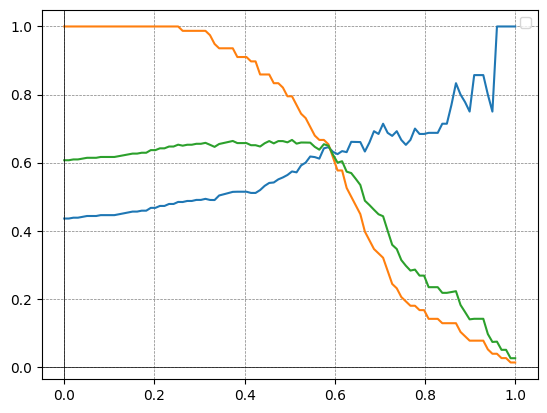

In [552]:
w = np.array([-1, 2])
b = 0.5

x = np.linspace(0, 1, 100)
p = list(map(lambda n: precision_score(y_test, y_pred > n), x))
r = list(map(lambda n: recall_score(y_test, y_pred > n), x))
f = list(map(lambda n: f1_score(y_test, y_pred > n), x))
plt.plot(x, p)
plt.plot(x, r)
plt.plot(x, f)


plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

### Задача 6 

Какой порог соответствует максимизации f1 score, precision и recall?

In [553]:
ans = 0
score = 0

for i in range(len(x)):
    if sum([p[i], r[i], f[i]]) > score:
        score = sum([p[i], r[i], f[i]])
        ans = x[i]
ans

0.31313131313131315

### Задача 7(2 балла)

Обучите линейную регрессию с регуляризацией и подберите параметр регуляризации исходя из максимального f1-score.

In [554]:
ans = 0
score = 0

for i in range(len(x)):
    if f[i] > score:
        score = f[i]
        ans = x[i]
ans

0.5050505050505051

In [555]:
scaler = StandardScaler()
X_train_le = scaler.fit_transform(X_train_le)
X_test_le = scaler.transform(X_test_le)

0.6705882352941176

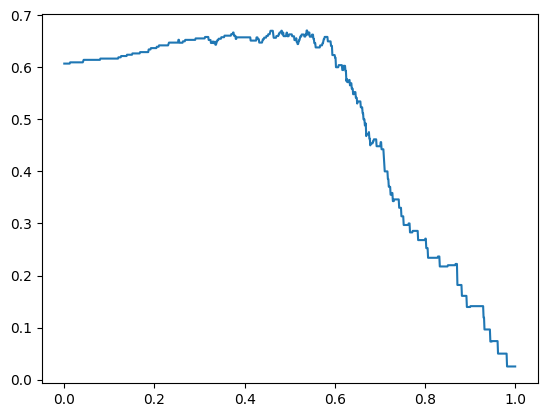

In [556]:
from sklearn.linear_model import Ridge, Lasso

clf = Ridge()
clf.fit(X_train_le, y_train)
y_pred = clf.predict(X_test_le)

x = np.linspace(0, 1, 1000)
f = list(map(lambda n: f1_score(y_test, y_pred > n), x))

plt.plot(x, f)

ans = 0
score = 0

for i in range(len(x)):
    if f[i] > score:
        score = f[i]
        ans = x[i]
ans

f1_score(y_test, y_pred > ans)

### Задача 8 (3 балла)

Разбейте датасет telecom_churn на обучающую выборку и тестовую с параметром(0.25)

Постройте бинарную классификацию, используя знания полученные раннее и попытайтесь предсказать отток клиентов(Churn). 

In [557]:
df = pd.read_csv("telecom_churn.csv")

In [558]:
X = df[df.columns[:-1]].select_dtypes([np.number])
y = df["Churn"]

In [559]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, \
                                                     test_size=0.3,\
                                                     shuffle=True,
                                                     random_state=0)

In [560]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [561]:
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred > 0.5)

0.864